## This notebook loads inspection data for rectangular seals made from three different materials. Its hard to see any patterns in the raw data so 'Principal Component analysis (PCA) is used  to identify the difference between three different types.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

In [2]:
# loading dataset into Pandas DataFrame
df = pd.read_csv('Seal Wear Data.csv'
                 , names=['seal length','seal width','cutout length','cutout width','type'])

In [3]:
df.head()

,seal length,seal width,cutout length,cutout width,type
0,5.1,3.5,1.4,0.2,Seal Type A
1,4.9,3.0,1.4,0.2,Seal Type A
2,4.7,3.2,1.3,0.2,Seal Type A
3,4.6,3.1,1.5,0.2,Seal Type A
4,5.0,3.6,1.4,0.2,Seal Type A


## Name the data columns and normalise (scale) values to be in range 0 to 1  

In [4]:
features = ['seal length', 'seal width', 'cutout length', 'cutout width']
x = df.loc[:, features].values

In [5]:
y = df.loc[:,['type']].values

In [6]:
x = StandardScaler().fit_transform(x)

In [7]:
pd.DataFrame(data = x, columns = features).head()

,seal length,seal width,cutout length,cutout width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## PCA Projection to 2D

In [8]:
pca = PCA(n_components=2)

In [9]:
principalComponents = pca.fit_transform(x)

In [10]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [11]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [12]:
df[['type']].head()

,type
0,Seal Type A
1,Seal Type A
2,Seal Type A
3,Seal Type A
4,Seal Type A


In [13]:
finalDf = pd.concat([principalDf, df[['type']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,type
0,-2.264542,0.505704,Seal Type A
1,-2.086426,-0.655405,Seal Type A
2,-2.367950,-0.318477,Seal Type A
3,-2.304197,-0.575368,Seal Type A
4,-2.388777,0.674767,Seal Type A


<IPython.core.display.Javascript object>


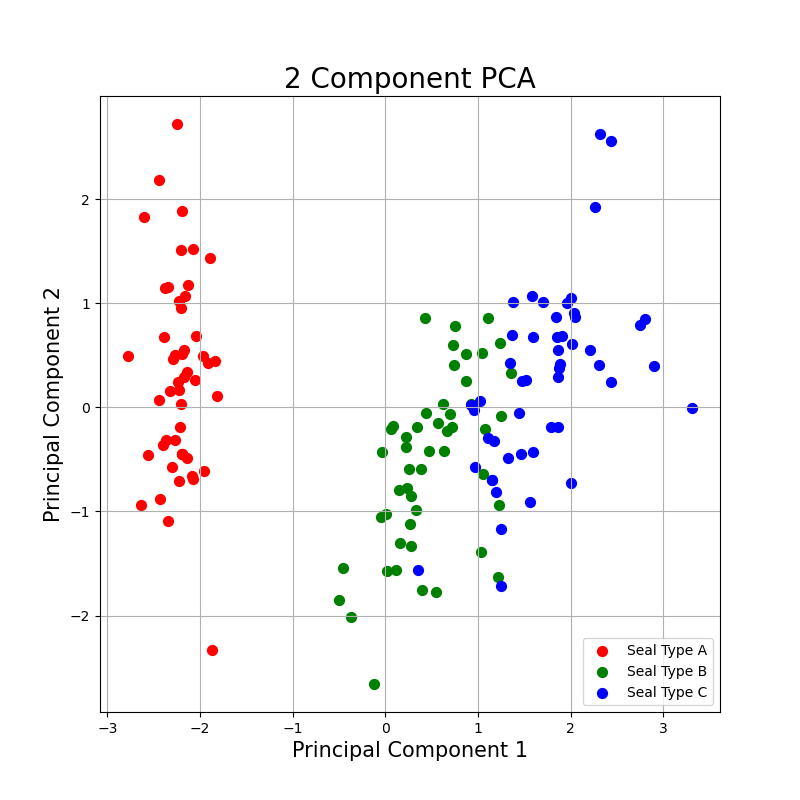

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Seal Type A', 'Seal Type B', 'Seal Type C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()